# LEAD SCORING

## Required Libraries

In [1]:
#Importing required libraries

import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve



%matplotlib inline
warnings.filterwarnings('ignore')          #Supressing warnings
pd.set_option("display.max_rows",500)
pd.set_option("display.max_columns",500)
pd.set_option("display.max_colwidth",5000)

## Data Used For Analysis

In [2]:
#Reading file Leads.csv as lea

lea=pd.read_csv("Leads.csv")
lea.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#Checking total rows and cols in dataset

lea.shape

(9240, 37)

In [4]:
lea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
#Statistical summary of data

lea.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
#Checking for duplicates

sum(lea.duplicated(subset = 'Prospect ID')) == 0

True

In [7]:
#Checking for duplicates

sum(lea.duplicated(subset = 'Lead Number')) == 0

True

* No duplicate values in Prospect ID and Lead Number.
* They are just indicative of the ID number of the Contacted People and can be dropped.

## Data Cleaning

In [8]:
lead_copy=lea.copy()

In [9]:
lead_copy.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [10]:
#Dropping Lead Number and Prospect ID as they have all unique values

lea.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [11]:
#Converting 'Select' values to NaN.

lea = lea.replace('Select', np.nan)

In [12]:
#Checking percentage of null values in each column

round((lea.isnull().sum()/len(lea)*100),2).sort_values(ascending = False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Get updates on DM Content                         0.00
Update me 

In [13]:
#Creating a list of columns having null values > 45%

nul_val = lea.isnull().sum()
nul_val = nul_val[nul_val.values >(0.45*len(lea))]
len(nul_val)

7

In [14]:
#Dropping the columns having null values > 45%

null_col = list(nul_val.index.values)                  
lea.drop(labels = null_col,axis=1,inplace = True)

In [15]:
#Checking null values percentage after dropping the null vales > 45%

round((lea.isnull().sum()/len(lea)*100),2).sort_values(ascending = False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
Update me on Supply Chain Content                 0.00
Lead Origin                                       0.00
Digital Advertisement                             0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Magazine  

### Checking Data Imbalance

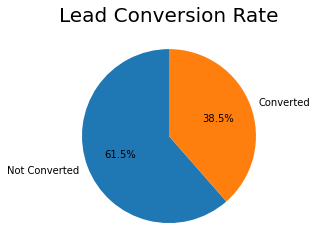

In [16]:
#Plotting pie chart to visualize Data imbalancing

plt.pie(lea.Converted.value_counts(normalize = True)*100, autopct='%1.1f%%', startangle=90 , labels = [ 'Not Converted', 'Converted'])
plt.title('Lead Conversion Rate',fontsize=20)
plt.show()

* 38.5% Leads are converted to Paying Customers.

## Categorical Attributes Analysis:

### Country

In [17]:
#Checking value counts of Country column

lea['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

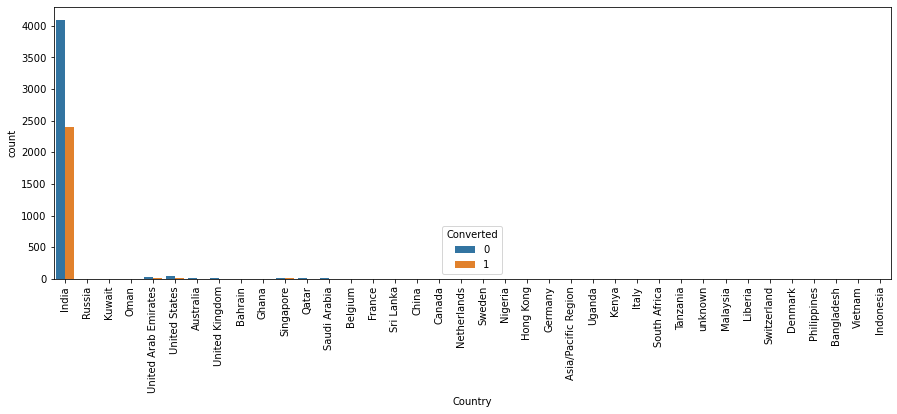

In [18]:
#Plotting countplot to visualize country column

plt.figure(figsize=(15,5))
c1=sns.countplot(lea.Country, hue=lea.Converted)
c1.set_xticklabels(c1.get_xticklabels(),rotation=90)
plt.show()

* Above India has the high occurence values than others. we can impute all missing values with India.

In [19]:
#Replacing Nan values with 'India'

lea['Country'] = lea['Country'].replace(np.nan,'India')

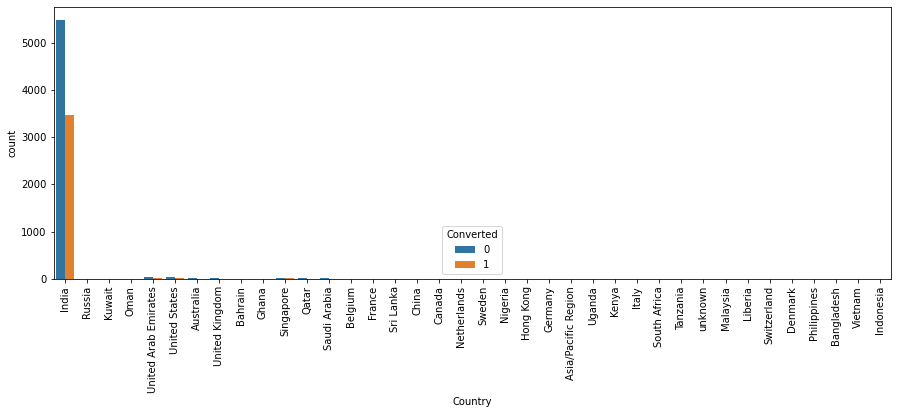

In [20]:
#Visualize country column after replacing NaN values

plt.figure(figsize=(15,5))
c1=sns.countplot(lea.Country, hue=lea.Converted)
c1.set_xticklabels(c1.get_xticklabels(),rotation=90)
plt.show()

* Above we can see above the Number of Values for India are high than other countries, this column can be dropped

In [21]:
#Creating a list of columns to be droppped furthure

cols_to_drop=['Country']

### City

In [22]:
#Checking value counts of City column

lea['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [23]:
#Replacing Nan values with 'Other Cities'

lea['City'] = lea['City'].replace(np.nan,'Other Cities')

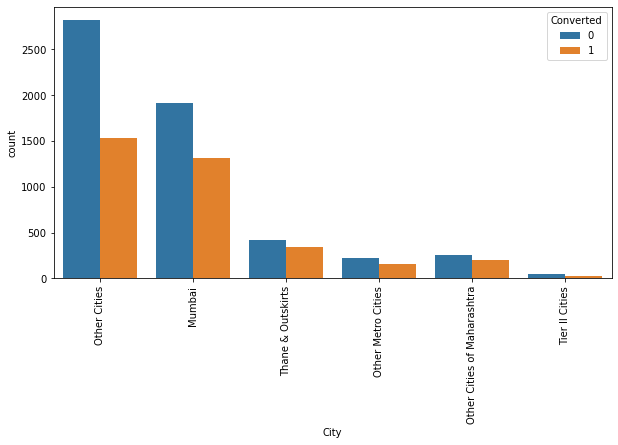

In [24]:
#Visualize City column after replacing NaN values

plt.figure(figsize=(10,5))
c1=sns.countplot(lea.City, hue=lea.Converted)
c1.set_xticklabels(c1.get_xticklabels(),rotation=90)
plt.show()

### Calculating Percentage Of Lead Conversion

In [25]:
#Creating crosstab to find out percentage

crosstab_df = pd.crosstab(lea['Converted'],
                  lea['City']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

City,Mumbai,Other Cities,Other Cities of Maharashtra,Other Metro Cities,Thane & Outskirts,Tier II Cities
Converted,,,,,,
0,59.37,64.8,56.02,59.21,55.05,66.22
1,40.63,35.2,43.98,40.79,44.95,33.78


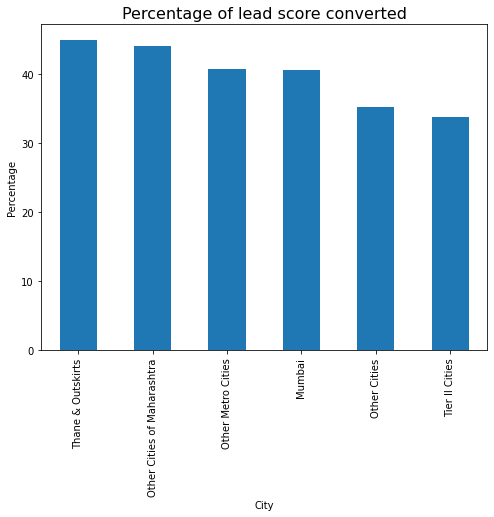

In [26]:
#Plotting bar chart to visualize

plt.figure( figsize = (8,6))
crosstab_df.iloc[1].sort_values(ascending = False).plot(kind = 'bar')
plt.title('Percentage of lead score converted',fontsize = 16)
plt.xlabel('City')
plt.ylabel('Percentage')
plt.show()

* There is no much difference

### What is your current occupation

In [27]:
#Checking value counts of What is your current occupation column

lea['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [28]:
#Replacing Nan values with 'Unemployed'

lea['What is your current occupation'] = lea['What is your current occupation'].replace(np.nan, 'Unemployed')

In [29]:
#Checking value counts again after imputing

lea['What is your current occupation'].value_counts()

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

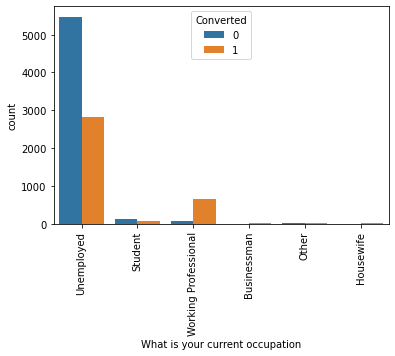

In [30]:
#Visualizing count of Variable based on Converted value

c1=sns.countplot(lea['What is your current occupation'], hue=lea.Converted)
c1.set_xticklabels(c1.get_xticklabels(),rotation=90)
plt.show()

* Unemployed are higher tha the others

### Percentage of Lead Conversion

In [31]:
#Creating crosstab to find out percentage

crosstab_df = pd.crosstab(lea['Converted'],
                  lea['What is your current occupation']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

What is your current occupation,Businessman,Housewife,Other,Student,Unemployed,Working Professional
Converted,,,,,,
0,37.5,0.0,37.5,62.86,66.09,8.36
1,62.5,100.0,62.5,37.14,33.91,91.64


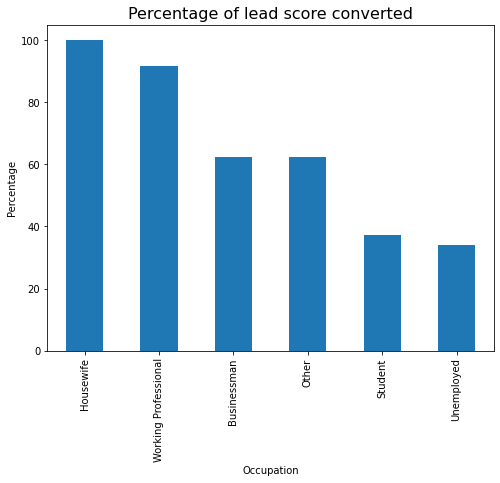

In [32]:
#Plotting bar chart to visualize better

plt.figure( figsize = (8,6))
crosstab_df.iloc[1].sort_values(ascending = False).plot(kind = 'bar')
plt.title('Percentage of lead score converted',fontsize = 16)
plt.xlabel('Occupation')
plt.ylabel('Percentage')
plt.show()

* Here we can see that Housewife have lowest frequency, but have 100% conversion rate.
* Working professionals have higher conversion frequency.

### What matters most to you in choosing a course

In [33]:
#Checking value counts of What matters most to you in choosing a course column

lea['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [34]:
#Replacing Nan values with 'Better Career Prospects'
lea['What matters most to you in choosing a course'] = lea['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

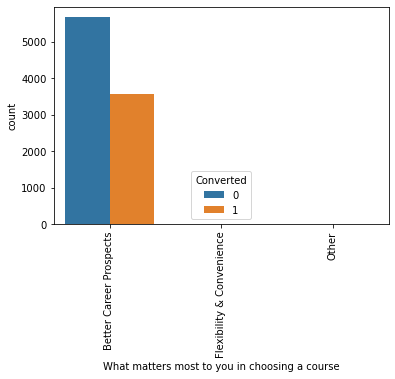

In [35]:
#Visualizing count of Variable based on Converted value

c1=sns.countplot(lea['What matters most to you in choosing a course'], hue=lea.Converted)
c1.set_xticklabels(c1.get_xticklabels(),rotation=90)
plt.show()

In [36]:
#Checking value counts of variable

lea['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

* Here we have Better Career Prospects very high than others. hence we will drop it

In [37]:
#We have another Column that is worth Dropping. So we Append to the cols_to_drop List

cols_to_drop.append('What matters most to you in choosing a course')
cols_to_drop

['Country', 'What matters most to you in choosing a course']

### Specialization

In [38]:
#Checking value counts of Specialization column

lea['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [39]:
#So we will replace NaN values here with Not Specified

lea['Specialization'] = lea['Specialization'].replace(np.nan, 'Not Specified')

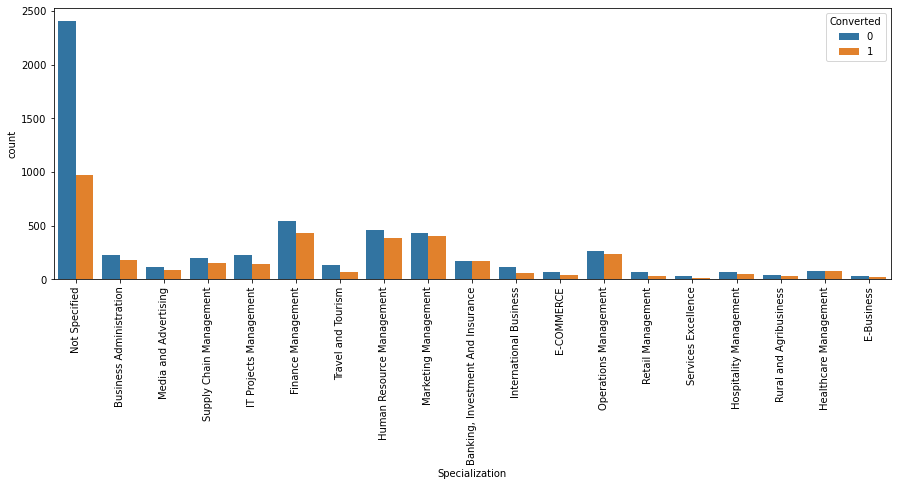

In [40]:
#Visualize Specialization column after replacing NaN values 

plt.figure(figsize=(15,5))
c1=sns.countplot(lea.Specialization, hue=lea.Converted)
c1.set_xticklabels(c1.get_xticklabels(),rotation=90)
plt.show()

In [41]:
#Combining all Management with the Management_Specializations because they show similar trends

lea['Specialization'] = lea['Specialization'].replace(['Supply Chain Management','IT Projects Management',
                                                     'Finance Management','Human Resource Management',
                                                     'Marketing Management','Operations Management',
                                                     'Retail Management','Hospitality Management',   
                                                    'Healthcare Management'] ,'Management_Specializations')  

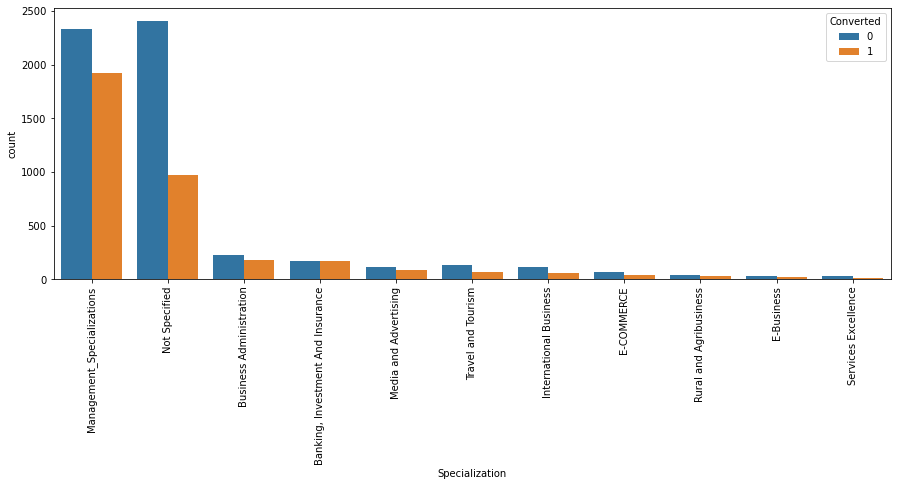

In [42]:
#Visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
c1=sns.countplot( lea.Specialization, hue = lea.Converted ,order = lea.Specialization.value_counts().index)
c1.set_xticklabels(c1.get_xticklabels(),rotation=90)
plt.show()

### Percentage of Lead Conversion

In [43]:
#Creating crosstab to find out percentage

crosstab_df = pd.crosstab(lea['Converted'],
                  lea['Specialization']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

Specialization,"Banking, Investment And Insurance",Business Administration,E-Business,E-COMMERCE,International Business,Management_Specializations,Media and Advertising,Not Specified,Rural and Agribusiness,Services Excellence,Travel and Tourism
Converted,,,,,,,,,,,
0,50.59,55.58,63.16,64.29,64.04,54.81,58.13,71.33,57.53,72.5,64.53
1,49.41,44.42,36.84,35.71,35.96,45.19,41.87,28.67,42.47,27.5,35.47


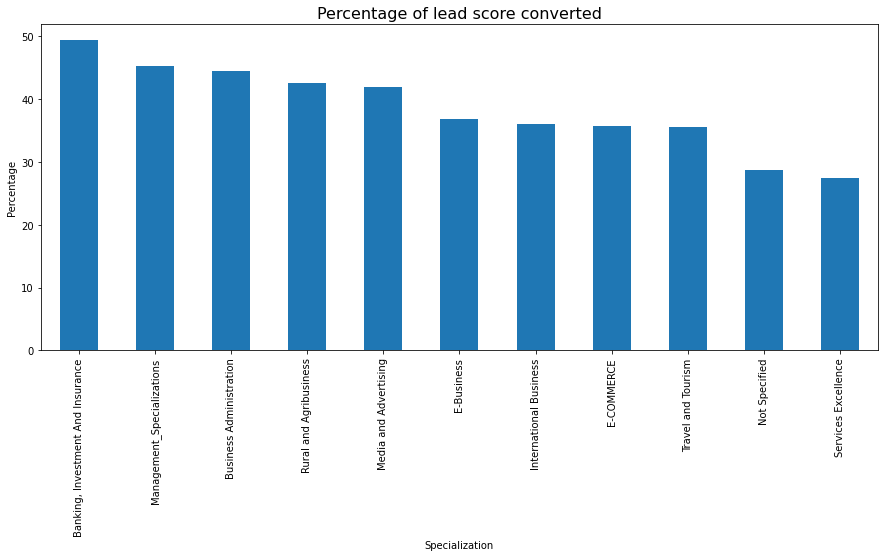

In [44]:
#Plotting bar chart to visualize

plt.figure( figsize = (15,6))
crosstab_df.iloc[1].sort_values(ascending = False).plot(kind = 'bar')
plt.title('Percentage of lead score converted',fontsize = 16)
plt.xlabel('Specialization')
plt.ylabel('Percentage')
plt.show()

* Banking, Investment and Insurance, Management Specialization , Business Administration have higher conversion percentage as compared to others.
* Where as Services Exellences have lowest conversion percentage.

### Tags

In [45]:
#Checking value counts of Tag variable

lea['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [46]:
#Replacing Nan values with "Not Specified"

lea['Tags'] = lea['Tags'].replace(np.nan,'Not Specified')

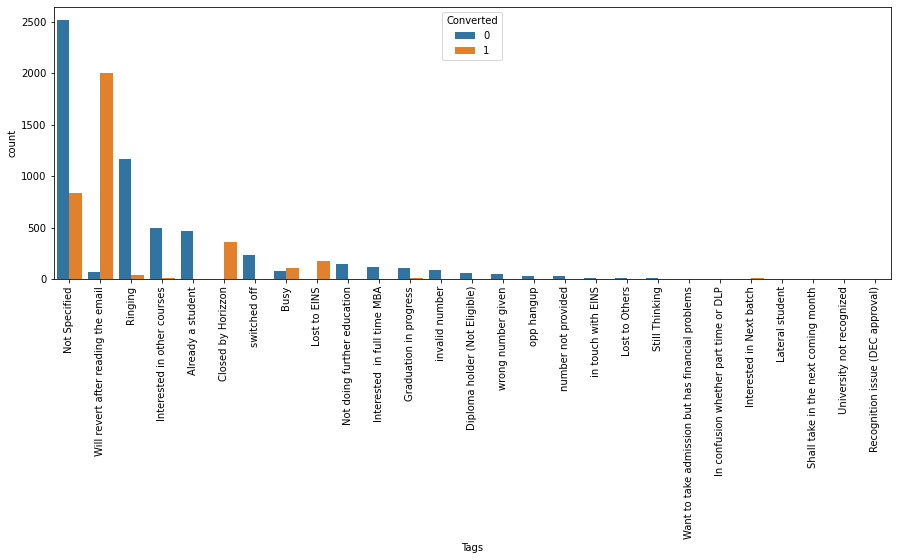

In [47]:
#Visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
c1=sns.countplot(lea['Tags'], hue=lea.Converted, order = lea.Tags.value_counts().index)
c1.set_xticklabels(c1.get_xticklabels(),rotation=90)
plt.show()

In [48]:
#Replacing low frequency tags with "Other Tags"

lea['Tags'] = lea['Tags'].replace(['Already a student','switched off','Not doing further education','Interested  in full time MBA',
                                'Graduation in progress','invalid number','Diploma holder (Not Eligible)','wrong number given',
                                 'opp hangup','number not provided','in touch with EINS','Lost to Others','Still Thinking',
                                'Want to take admission but has financial problems','In confusion whether part time or DLP',
                                'Interested in Next batch','Lateral student','Shall take in the next coming month',
                                'University not recognized','Recognition issue (DEC approval)'], 'Other_Tags')

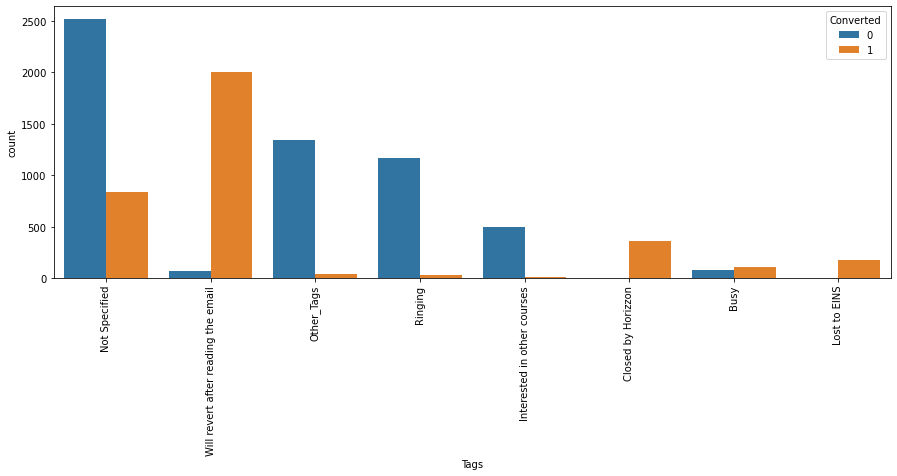

In [49]:
#Visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
c1=sns.countplot(lea['Tags'], hue=lea.Converted, order = lea.Tags.value_counts().index)
c1.set_xticklabels(c1.get_xticklabels(),rotation=90)
plt.show() 

### Percentage of Lead Conversion

In [50]:
#Creating crosstab to find out percentage

crosstab_df = pd.crosstab(lea['Converted'],
                  lea['Tags']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

Tags,Busy,Closed by Horizzon,Interested in other courses,Lost to EINS,Not Specified,Other_Tags,Ringing,Will revert after reading the email
Converted,,,,,,,,
0,43.55,0.56,97.47,2.29,75.07,97.17,97.17,3.14
1,56.45,99.44,2.53,97.71,24.93,2.83,2.83,96.86


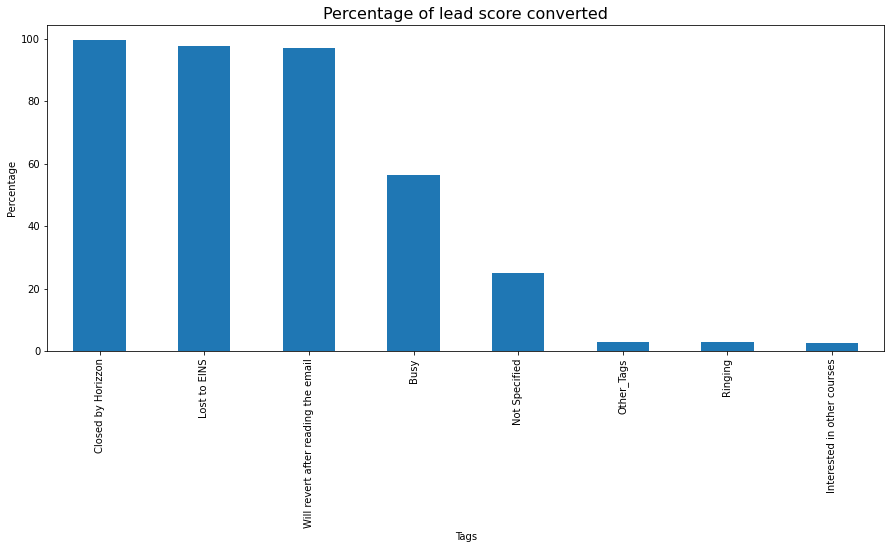

In [51]:
#Plotting bar chart to visualize

plt.figure( figsize = (15,6))
crosstab_df.iloc[1].sort_values(ascending = False).plot(kind = 'bar')
plt.title('Percentage of lead score converted',fontsize = 16)
plt.xlabel('Tags')
plt.ylabel('Percentage')
plt.show()

* Closed by Horizon, Lost to EINS and Will revent after reading the email have higher conversion rate.

### Lead Source

In [52]:
#Checking value counts of Lead Source column

lea['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [53]:
#Replacing Nan Values and combining low frequency values with 'Others'

lea['Lead Source'] = lea['Lead Source'].replace(np.nan,'Others')
lea['Lead Source'] = lea['Lead Source'].replace('google','Google')
lea['Lead Source'] = lea['Lead Source'].replace('Facebook','Social Media')
lea['Lead Source'] = lea['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')          

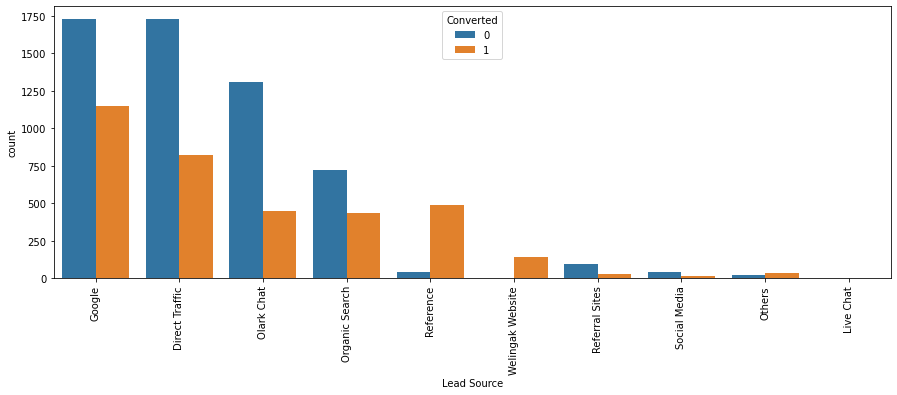

In [54]:
#Visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
c1=sns.countplot(lea['Lead Source'], hue=lea.Converted, order = lea['Lead Source'].value_counts().index)
c1.set_xticklabels(c1.get_xticklabels(),rotation=90)
plt.show()

* Maximum number of leads are generated by Google and Direct traffic.

### Percentage of Lead Conversion

In [55]:
#Creating crosstab to find out percentage

crosstab_df = pd.crosstab(lea['Converted'],
                  lea['Lead Source']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

Lead Source,Direct Traffic,Google,Live Chat,Olark Chat,Organic Search,Others,Reference,Referral Sites,Social Media,Welingak Website
Converted,,,,,,,,,,
0,67.83,60.08,0.0,74.47,62.22,36.36,8.24,75.2,75.44,1.41
1,32.17,39.92,100.0,25.53,37.78,63.64,91.76,24.8,24.56,98.59


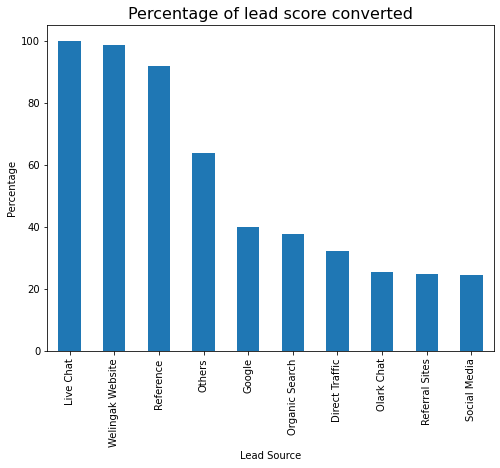

In [56]:
#Plotting bar chart to visualize

plt.figure( figsize = (8,6))
crosstab_df.iloc[1].sort_values(ascending = False).plot(kind = 'bar')
plt.title('Percentage of lead score converted',fontsize = 16)
plt.xlabel('Lead Source')
plt.ylabel('Percentage')
plt.show()

* Live Chat, Welingak Website , Referance leads with this lead sources have high conversion rate.
* Live chat have higher conversion rate though it have lowest frequency.

### Last Activity

In [57]:
#Checking value counts for last activity column

lea['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [58]:
#Replacing Nan Values and combining low frequency values with 'Others'

lea['Last Activity'] = lea['Last Activity'].replace(np.nan,'Others')
lea['Last Activity'] = lea['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [59]:
#Checking value counts for last activity column after replacing

lea['Last Activity'].value_counts()

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

### Percentage of Lead Conversion

In [60]:
#Creating crosstab to find out percentage

crosstab_df = pd.crosstab(lea['Converted'],
                  lea['Last Activity']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

Last Activity,Converted to Lead,Email Bounced,Email Link Clicked,Email Opened,Form Submitted on Website,Olark Chat Conversation,Others,Page Visited on Website,SMS Sent
Converted,,,,,,,,,
0,87.38,92.02,72.66,63.54,75.86,91.37,46.43,76.41,37.09
1,12.62,7.98,27.34,36.46,24.14,8.63,53.57,23.59,62.91


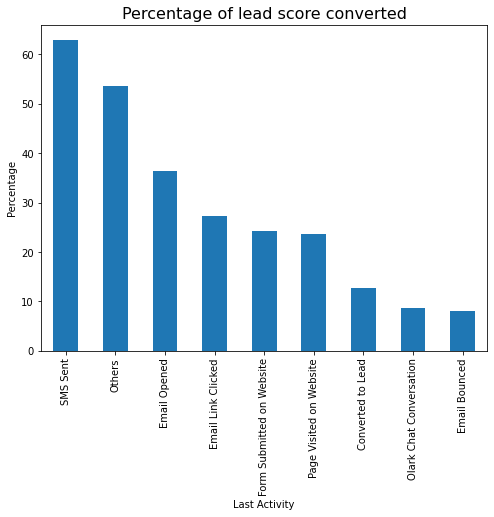

In [61]:
#Plotting bar chart to visualize

plt.figure( figsize = (8,6))
crosstab_df.iloc[1].sort_values(ascending = False).plot(kind = 'bar')
plt.title('Percentage of lead score converted',fontsize = 16)
plt.xlabel('Last Activity')
plt.ylabel('Percentage')
plt.show()

* Leads seems to be converted when SMS is sent.

In [62]:
#Check the Null Values in All Columns

round(100*(lea.isnull().sum()/len(lea.index)), 2).sort_values(ascending = False)

TotalVisits                                      1.48
Page Views Per Visit                             1.48
Lead Origin                                      0.00
Newspaper Article                                0.00
A free copy of Mastering The Interview           0.00
I agree to pay the amount through cheque         0.00
City                                             0.00
Get updates on DM Content                        0.00
Update me on Supply Chain Content                0.00
Tags                                             0.00
Receive More Updates About Our Courses           0.00
Through Recommendations                          0.00
Digital Advertisement                            0.00
Newspaper                                        0.00
X Education Forums                               0.00
Magazine                                         0.00
Lead Source                                      0.00
Search                                           0.00
What matters most to you in 

* Dropped rows less than 2%, Which will not affect the model.

In [63]:
#Drop all rows which have Nan Values.

lea = lea.dropna()

In [64]:
#Checking percentage of Null Values in All Columns

round(100*(lea.isnull().sum()/len(lea.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

### Leads Origin

In [65]:
#Checking value counts for Lead Origin column

lea['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

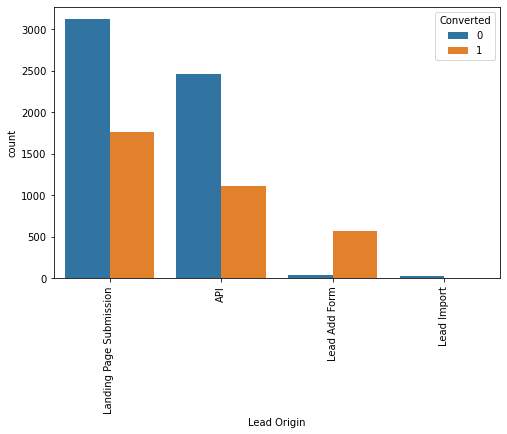

In [66]:
#Visualizing count of Variable based on Converted value

plt.figure(figsize=(8,5))
c1=sns.countplot(lea['Lead Origin'], hue=lea.Converted ,order = lea['Lead Origin'].value_counts().index )
c1.set_xticklabels(c1.get_xticklabels(),rotation=90)
plt.show()

* Landing Page Submission and API bring higher number of leads as well as conversion.
* Lead Add Form has a very high conversion rate but count of leads are very Low.
* Lead Import get very few leads.

### Percentage of Lead Conversion

In [67]:
#Creating crosstab to find out percentage

crosstab_df = pd.crosstab(lea['Converted'],
                  lea['Lead Origin']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

Lead Origin,API,Landing Page Submission,Lead Add Form,Lead Import
Converted,,,,
0,68.84,63.81,6.41,70.97
1,31.16,36.19,93.59,29.03


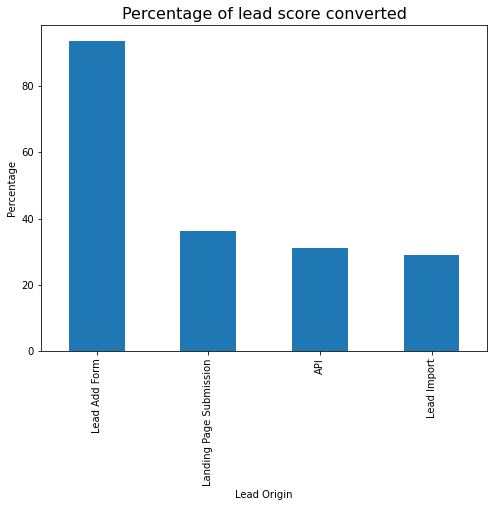

In [68]:
#Plotting bar chart to visualize

plt.figure( figsize = (8,6))
crosstab_df.iloc[1].sort_values(ascending = False).plot(kind = 'bar')
plt.title('Percentage of lead score converted',fontsize = 16)
plt.xlabel('Lead Origin')
plt.ylabel('Percentage')
plt.show()

* Leads generated higher from Lead Add form as compared to others.

### Do Not Call

In [69]:
#Checking value counts for Do Not Call column

lea['Do Not Call'].value_counts(dropna=False)

No     9101
Yes       2
Name: Do Not Call, dtype: int64

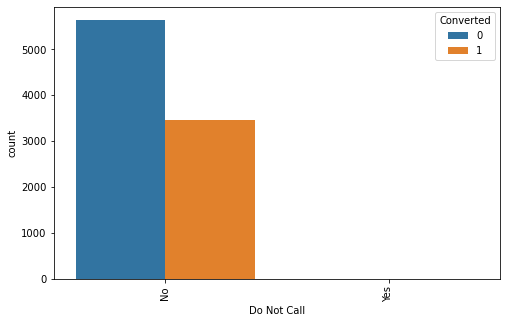

In [70]:
#Visualizing count of Variable based on Converted value

plt.figure(figsize=(8,5))
c1=sns.countplot(lea['Do Not Call'], hue=lea.Converted, order = lea['Do Not Call'].value_counts().index)
c1.set_xticklabels(c1.get_xticklabels(),rotation=90)
plt.show()

* We Can append the Do Not Call Column to the list of Columns to be Dropped since it has only one value.

In [71]:
cols_to_drop.append('Do Not Call')
cols_to_drop

['Country', 'What matters most to you in choosing a course', 'Do Not Call']

### Do Not Email

In [72]:
#Checking value counts for Do Not Email

lea['Do Not Email'].value_counts(dropna=False)

No     8379
Yes     724
Name: Do Not Email, dtype: int64

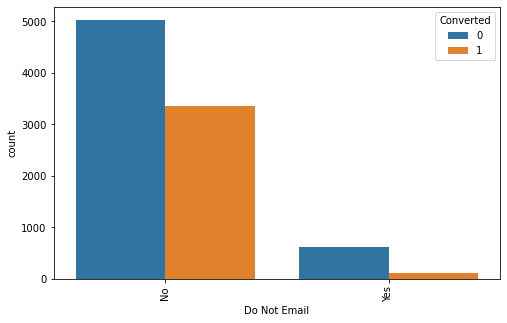

In [73]:
#Visualizing count of Variable based on Converted value

plt.figure(figsize=(8,5))
c1=sns.countplot(lea['Do Not Email'], hue=lea.Converted, order = lea['Do Not Email'].value_counts().index)
c1.set_xticklabels(c1.get_xticklabels(),rotation=90)
plt.show()

### Search

In [74]:
#Checking value counts of Search columns

lea.Search.value_counts(dropna=False)

No     9089
Yes      14
Name: Search, dtype: int64

* Search Column is highly imbalanced.

In [75]:
#Appending the Search Column to the list of Columns to be Dropped since it is highly imbalanced.

cols_to_drop.append('Search')

### Magazine

In [76]:
#Checking value counts of Magazine columns

lea.Magazine.value_counts(dropna=False)

No    9103
Name: Magazine, dtype: int64

* Append the Magazine Column to the list of Columns to be Dropped since it has only one value.

In [77]:
#Appending the Magazine Column to the list of Columns to be Dropped

cols_to_drop.append('Magazine')

### Newspaper Article

In [78]:
#Checking value counts of Newspaper Article columns

lea['Newspaper Article'].value_counts(dropna=False)

No     9101
Yes       2
Name: Newspaper Article, dtype: int64

* Append the News Article Column to the list of Columns to be Dropped since it is highly imbalanced.

In [79]:
#Appending the News Article Column to the list of Columns to be Dropped

cols_to_drop.append('Newspaper Article')

### X Education Forums

In [80]:
#Checking value counts of X Education Forums columns

lea['X Education Forums'].value_counts(dropna=False)

No     9102
Yes       1
Name: X Education Forums, dtype: int64


* Append the X Education Forums Column to the list of Columns to be Dropped since it is highly imbalanced.

In [81]:
#Appending the X Education Forums Column to the list of Columns to be Dropped

cols_to_drop.append('X Education Forums')

### Newspaper

In [82]:
#Checking value counts of Newspaper columns

lea['Newspaper'].value_counts(dropna=False)

No     9102
Yes       1
Name: Newspaper, dtype: int64

* Append the Newspaper Column to the list of Columns to be Dropped since it is highly imbalanced.

In [83]:
#Appending the Newspaper Column to the list of Columns to be Dropped

cols_to_drop.append('Newspaper')

### Digital Advertisement

In [84]:
#Checking value counts of Digital Advertisement columns

lea['Digital Advertisement'].value_counts(dropna=False)

No     9099
Yes       4
Name: Digital Advertisement, dtype: int64

* Append the Digital Advertisement Column to the list of Columns to be Dropped since it is highly imbalanced.

In [85]:
#Appending the Digital Advertisement Column to the list of Columns to be Dropped

cols_to_drop.append('Digital Advertisement')

### I agree to pay the amount through cheque

In [86]:
#Checking value counts of I agree to pay the amount through cheque columns

lea['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9103
Name: I agree to pay the amount through cheque, dtype: int64

* Append the I agree to pay the amount through cheque Column to the list of Columns to be Dropped since it has only one value.

In [87]:
#Appending the I agree to pay the amount through cheque Column to the list of Columns to be Dropped

cols_to_drop.append('I agree to pay the amount through cheque')

### Get updates on DM Content

In [88]:
#Checking value counts of Get updates on DM Content columns

lea['Get updates on DM Content'].value_counts(dropna=False)

No    9103
Name: Get updates on DM Content, dtype: int64

 * Append the Get updates on DM Content Column to the list of Columns to be Dropped since it has only one value.

In [89]:
#Appending the Get updates on DM Content Column to the list of Columns to be Dropped

cols_to_drop.append('Get updates on DM Content')

### Through Recommendations

In [90]:
#Checking value counts of Through Recommendations columns

lea['Through Recommendations'].value_counts(dropna=False)

No     9096
Yes       7
Name: Through Recommendations, dtype: int64

* Append the Through Recommendations Column to the list of Columns to be Dropped since it is highly imbalanced.

In [91]:
#Appending the Through Recommendations Column to the list of Columns to be Dropped

cols_to_drop.append('Through Recommendations')

### Receive More Updates About Our Courses

In [92]:
#Checking value counts of Receive More Updates About Our Courses columns

lea['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9103
Name: Receive More Updates About Our Courses, dtype: int64

 * Append the Receive More Updates About Our Courses Column to the list of Columns to be Dropped since it has only one value.

In [93]:
#Appending the Receive More Updates About Our Courses Column to the list of Columns to be Dropped

cols_to_drop.append('Receive More Updates About Our Courses')

### Update me on Supply Chain Content

In [94]:
#Checking value counts of Update me on Supply Chain Content columns

lea['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9103
Name: Update me on Supply Chain Content, dtype: int64

 * Append the Update me on Supply Chain Content Column to the list of Columns to be Dropped since it has only one value.

In [95]:
#Appending the Update me on Supply Chain Content Column to the list of Columns to be Dropped

cols_to_drop.append('Update me on Supply Chain Content')

### Last Notable Activity

In [96]:
#Checking value counts of last Notable Activity

lea['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [97]:
#Cubbing lower frequency values to Other_Notable_activity

lea['Last Notable Activity'] = lea['Last Notable Activity'].replace(['Email Bounced',
                                                                     'Unsubscribed',
                                                                     'Unreachable',
                                                                     'Had a Phone Conversation',
                                                                     'Email Marked Spam',
                                                                     'Approached upfront',
                                                                     'Resubscribed to emails',
                                                                     'View in browser link Clicked',
                                                                     'Form Submitted on Website',
                                                                     'Email Received'],'Other_Notable_activity')

In [98]:
#Checking value counts for variable after cubbing

lea['Last Notable Activity'].value_counts()

Modified                   3270
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      160
Name: Last Notable Activity, dtype: int64

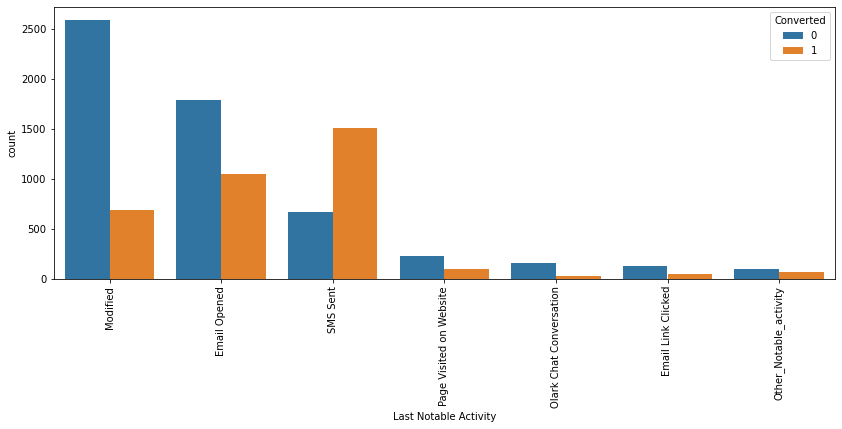

In [99]:
#Visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
c1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lea, order = lea["Last Notable Activity"].value_counts().index)
c1.set_xticklabels(c1.get_xticklabels(),rotation=90)
plt.show()

### Percentage of Lead Conversion

In [100]:
#Creating crosstab to find out percentage

crosstab_df = pd.crosstab(lea['Converted'],
                  lea['Last Notable Activity']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

Last Notable Activity,Email Link Clicked,Email Opened,Modified,Olark Chat Conversation,Other_Notable_activity,Page Visited on Website,SMS Sent
Converted,,,,,,,
0,73.99,63.07,79.11,86.34,60.62,70.75,30.57
1,26.01,36.93,20.89,13.66,39.38,29.25,69.43


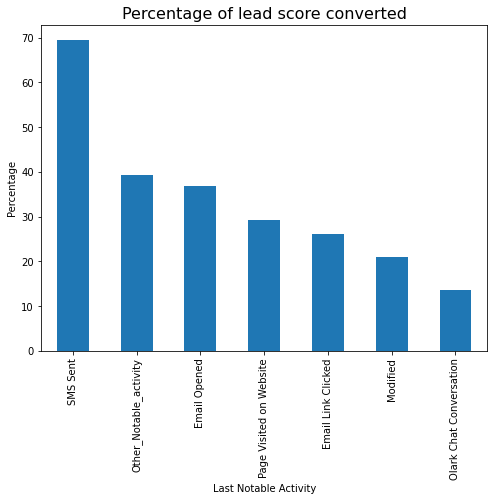

In [101]:
#Plotting bar chart to visualize

plt.figure( figsize = (8,6))
crosstab_df.iloc[1].sort_values(ascending = False).plot(kind = 'bar')
plt.title('Percentage of lead score converted',fontsize = 16)
plt.xlabel('Last Notable Activity')
plt.ylabel('Percentage')
plt.show()

### Dropping Imbalanced Columns

In [102]:
#List of columns to be dropped

cols_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'I agree to pay the amount through cheque',
 'Get updates on DM Content',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content']

In [103]:
#Dropping columns

lea = lea.drop(cols_to_drop,1)
lea.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   obje

## Numerical Attributes Analysis

### Converted

In [104]:
#Check the % of Data that has Converted Values = 1:

Converted = (sum(lea['Converted'])/len(lea['Converted'].index))*100
Converted

38.02043282434362

* 38% leads converted to paying customers

### Heatmap

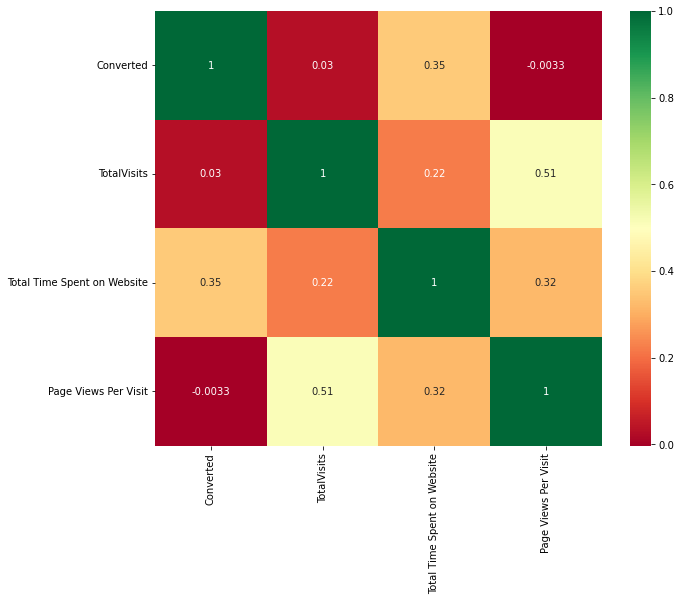

In [105]:
#Checking correlations of numeric values

plt.figure(figsize=(10,8))
sns.heatmap(lea.corr(), cmap='RdYlGn', annot=True)
plt.show()

### Total Visits

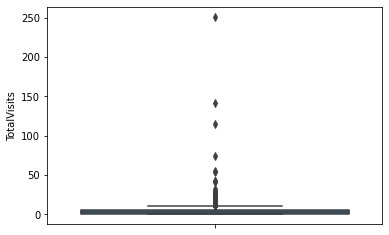

In [106]:
#Visualizing of numeric variable using boxplot

plt.figure(figsize=(6,4))
sns.boxplot(y=lea['TotalVisits'])
plt.show()

* Outliers are present here

In [107]:
#Checking percentile values for "Total Visits"

lea['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

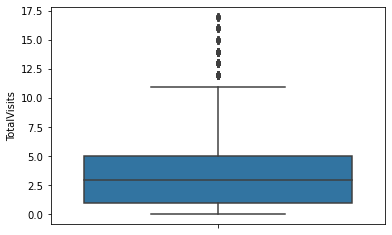

In [108]:
#Removing the top & bottom 1% of the Column Outlier values

Q3 = lea.TotalVisits.quantile(0.99)
lea = lea[(lea.TotalVisits <= Q3)]
Q1 = lea.TotalVisits.quantile(0.01)
lea = lea[(lea.TotalVisits >= Q1)]
sns.boxplot(y=lea['TotalVisits'])
plt.show()

In [109]:
lea.shape

(9020, 14)

### Total Time Spent on Website

In [110]:
#Checking percentiles for "Total Time Spent on Website"

lea['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9020.000000
mean      479.759534
std       544.688157
min         0.000000
5%          0.000000
25%         7.000000
50%       243.000000
75%       915.250000
90%      1371.000000
95%      1554.050000
99%      1836.620000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

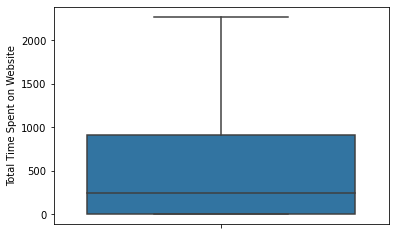

In [111]:
#Visualizing of numeric variable using boxplot

plt.figure(figsize=(6,4))
sns.boxplot(y=lea['Total Time Spent on Website'])
plt.show()

 * There are no major Outliers

### Page Views Per Visit

In [112]:
#Checking percentile values for "Page Views Per Visit"

lea['Page Views Per Visit'].describe()

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

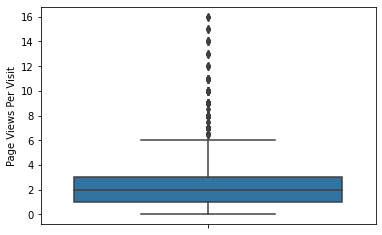

In [113]:
#Visualizing of numeric variable using boxplot

plt.figure(figsize=(6,4))
sns.boxplot(y=lea['Page Views Per Visit'])
plt.show()

* Outliers are present

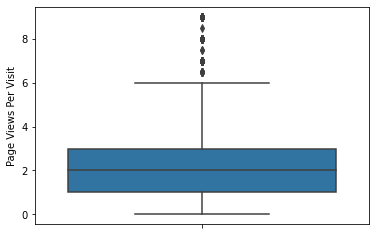

In [114]:
#Removing the top & bottom 1% of the Column Outlier values

Q3 = lea['Page Views Per Visit'].quantile(0.99)
lea = lea[lea['Page Views Per Visit'] <= Q3]
Q1 = lea['Page Views Per Visit'].quantile(0.01)
lea = lea[lea['Page Views Per Visit'] >= Q1]
sns.boxplot(y=lea['Page Views Per Visit'])
plt.show()

In [115]:
lea.shape

(8953, 14)

### Total Time Spent on Website

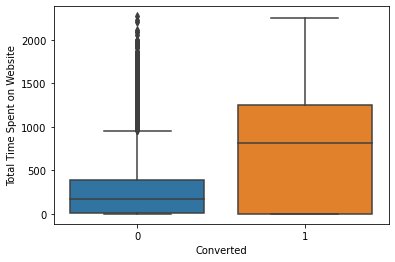

In [116]:
#Checking Spread of "Total Time Spent on Website" vs Converted variable using boxplot

sns.boxplot(x=lea.Converted, y=lea['Total Time Spent on Website'])
plt.show()

* Spending more time on the website are more likely to be converted.

### Total Visits

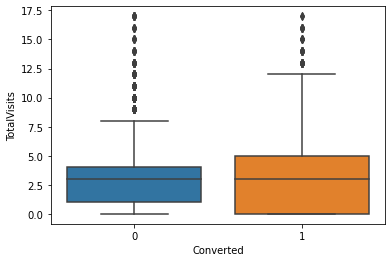

In [117]:
#Checking Spread of "Total Visits" vs Converted variable using boxplot

sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lea)
plt.show()

* Nothng conclusive can be said on the basis of Total Visits

### Page Views Per Visit

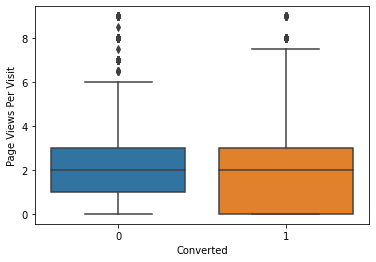

In [118]:
#Checking Spread of "Page Views Per Visit" vs Converted variable using boxplot

sns.boxplot(x=lea.Converted,y=lea['Page Views Per Visit'])
plt.show()

* Median for converted and unconverted is the same.

In [119]:
#Checking missing values in leftover columns

round(100*(lea.isnull().sum()/len(lea.index)),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

* There are no missing values

### Dummy variable Creation

In [120]:
#Getting a list of categorical columns

cat_cols= lea.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [121]:
#List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

#Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

#Applying the function to the housing list
lea[varlist] = lea[varlist].apply(binary_map)

In [122]:
#Getting dummies and dropping the first column and adding the results to the master dataframe

dummy = pd.get_dummies(lea[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

lea = pd.concat([lea,dummy],1)

In [123]:
dummy = pd.get_dummies(lea['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
lea = pd.concat([lea, dummy], axis = 1)

In [124]:
dummy = pd.get_dummies(lea['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
lea = pd.concat([lea, dummy], axis = 1)

In [125]:
dummy = pd.get_dummies(lea['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], 1)
lea = pd.concat([lea, dummy], axis = 1)

In [126]:
dummy = pd.get_dummies(lea['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
lea = pd.concat([lea, dummy], axis = 1)

In [127]:
dummy = pd.get_dummies(lea['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
lea = pd.concat([lea, dummy], axis = 1)

In [128]:
#Dropping the original columns after dummy variable creation

lea.drop(cat_cols,1,inplace = True)

## MODEL BUILDING

In [129]:
#Putting response variable to y

y = lea['Converted']
y.head()
X=lea.drop('Converted', axis=1)

In [130]:
#Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [131]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Data columns (total 56 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6267 non-null   float64
 1   Total Time Spent on Website                           6267 non-null   int64  
 2   Page Views Per Visit                                  6267 non-null   float64
 3   Lead Origin_Landing Page Submission                   6267 non-null   uint8  
 4   Lead Origin_Lead Add Form                             6267 non-null   uint8  
 5   Lead Origin_Lead Import                               6267 non-null   uint8  
 6   What is your current occupation_Housewife             6267 non-null   uint8  
 7   What is your current occupation_Other                 6267 non-null   uint8  
 8   What is your current occupation_Student               6

### Scaling of Data

In [132]:
#Instantiating object
scaler = StandardScaler()  

#Creating list containing numerical columns
num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

In [133]:
#Fit and transform the data

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
9196,0.668862,1.848117,1.455819,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4696,-0.030697,-0.037832,0.399961,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3274,0.319082,-0.642138,-0.127967,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2164,-0.380477,-0.154676,-0.127967,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1667,0.319082,1.258415,-0.481679,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0


## Model Building using Stats Model & RFE

In [134]:
logreg = LogisticRegression()
rfe = RFE(logreg, 15)             #Running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [135]:
rfe.support_

array([False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False,  True, False,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False,  True, False, False,  True,  True,
       False,  True])

In [136]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 25),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 23),
 ('Lead Origin_Landing Page Submission', False, 10),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 16),
 ('What is your current occupation_Housewife', False, 28),
 ('What is your current occupation_Other', False, 32),
 ('What is your current occupation_Student', False, 22),
 ('What is your current occupation_Unemployed', False, 20),
 ('What is your current occupation_Working Professional', False, 8),
 ('City_Other Cities', False, 36),
 ('City_Other Cities of Maharashtra', False, 33),
 ('City_Other Metro Cities', False, 39),
 ('City_Thane & Outskirts', False, 38),
 ('City_Tier II Cities', False, 30),
 ('Specialization_Banking, Investment And Insurance', False, 14),
 ('Specialization_Business Administration', False, 37),
 ('Specialization_E-Business', False, 34),
 ('Specialization_E-COMMERCE', False, 21),
 ('Specialization_International Business', F

In [137]:
#Creating a list for RFE selected col

col = X_train.columns[rfe.support_]
list(col)

['Total Time Spent on Website',
 'Lead Origin_Lead Add Form',
 'Lead Source_Direct Traffic',
 'Lead Source_Referral Sites',
 'Lead Source_Welingak Website',
 'Tags_Closed by Horizzon',
 'Tags_Interested in other courses',
 'Tags_Lost to EINS',
 'Tags_Other_Tags',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Last Activity_SMS Sent',
 'Last Notable Activity_Modified',
 'Last Notable Activity_Olark Chat Conversation',
 'Last Notable Activity_SMS Sent']

In [138]:
#Columns not selected by RFE

X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Sourc

## Model 1

In [139]:
X_train_sm = sm.add_constant(X_train[col])  # adding constant
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()) 
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1254.7
Date:                Thu, 05 May 2022   Deviance:                       2509.3
Time:                        23:13:55   Pearson chi2:                 8.34e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1899      0.088    -13.480      0.000      -1.363      -1.017
Total Time Spent on Website                       0.8970      0.053     16.999      0.000       0.794       1.000
Lead Origin_Lead Add Form                         1.6712      0.450      3.714      0.000       0.789       2.553
Lead Source_Direct Traffic                       -0.8320      0.129     -6.471      0.000      -1.084      -0.580
Lead Source_Referral Sites                       -0.5284      0.465     -1.138      0.255      -1.439       0.382
Lead Source_Welingak Website                      3.9043      1.110      3.518      0.000       1.729       6.079
Tags_Closed by Horizzon                           6.9834      1.019      6.853      0.000       4.986       8.981
Tags_Interested in other courses                 -2.1641      0.407     -5.321      0.000      -2.961      -1.367
Tags_Lost to EINS                                 5.7302      0.608      9.419      0.000       4.538       6.923
Tags_Other_Tags                                  -2.4417      0.210    -11.633      0.000      -2.853      -2.030
Tags_Ringing                                     -3.5858      0.243    -14.752      0.000      -4.062      -3.109
Tags_Will revert after reading the email          4.4263      0.185     23.989      0.000       4.065       4.788
Last Activity_SMS Sent                            1.2373      0.223      5.555      0.000       0.801       1.674
Last Notable Activity_Modified                   -1.2839      0.150     -8.532      0.000      -1.579      -0.989
Last Notable Activity_Olark Chat Conversation    -1.7123      0.490     -3.496      0.000      -2.672      -0.752
Last Notable Activity_SMS Sent                    1.0151      0.257      3.943      0.000       0.511       1.520
=================================================================================================================
"""

* p-value of variable Lead Source_Referral Sites is high, so we will drop it.

In [140]:
#Dropping high p-value column

col = col.drop('Lead Source_Referral Sites',1)

## Model 2

In [141]:
X_train_sm = sm.add_constant(X_train[col])     # adding constant
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()) 
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1255.3
Date:                Thu, 05 May 2022   Deviance:                       2510.7
Time:                        23:13:58   Pearson chi2:                 8.34e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.2029      0.088    -13.729      0.000      -1.375      -1.031
Total Time Spent on Website                       0.8963      0.053     16.979      0.000       0.793       1.000
Lead Origin_Lead Add Form                         1.6795      0.450      3.735      0.000       0.798       2.561
Lead Source_Direct Traffic                       -0.8224      0.128     -6.409      0.000      -1.074      -0.571
Lead Source_Welingak Website                      3.9060      1.110      3.520      0.000       1.731       6.081
Tags_Closed by Horizzon                           6.9868      1.019      6.857      0.000       4.990       8.984
Tags_Interested in other courses                 -2.2028      0.409     -5.391      0.000      -3.004      -1.402
Tags_Lost to EINS                                 5.7337      0.608      9.426      0.000       4.541       6.926
Tags_Other_Tags                                  -2.4401      0.210    -11.625      0.000      -2.852      -2.029
Tags_Ringing                                     -3.5818      0.243    -14.740      0.000      -4.058      -3.106
Tags_Will revert after reading the email          4.4234      0.184     23.993      0.000       4.062       4.785
Last Activity_SMS Sent                            1.2437      0.223      5.584      0.000       0.807       1.680
Last Notable Activity_Modified                   -1.2791      0.150     -8.501      0.000      -1.574      -0.984
Last Notable Activity_Olark Chat Conversation    -1.7079      0.489     -3.491      0.000      -2.667      -0.749
Last Notable Activity_SMS Sent                    1.0150      0.257      3.943      0.000       0.510       1.520
=================================================================================================================
"""

* Hence All the p-values are less we can check the Variance Inflation Factor

In [142]:
#Create a dataframe which contain all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Last Notable Activity_SMS Sent,6.22
10,Last Activity_SMS Sent,6.12
1,Lead Origin_Lead Add Form,1.82
11,Last Notable Activity_Modified,1.69
9,Tags_Will revert after reading the email,1.61
2,Lead Source_Direct Traffic,1.38
3,Lead Source_Welingak Website,1.34
7,Tags_Other_Tags,1.26
0,Total Time Spent on Website,1.22
4,Tags_Closed by Horizzon,1.21


* There is a high correlation between two variables so drop the variable with the high VIF value

In [143]:
#Dropping variable with high VIF

col = col.drop('Last Notable Activity_SMS Sent',1)

### Model 3

In [144]:
X_train_sm = sm.add_constant(X_train[col]) #Adding constant
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())   #Running the model
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1263.3
Date:                Thu, 05 May 2022   Deviance:                       2526.6
Time:                        23:14:05   Pearson chi2:                 8.51e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1179      0.084    -13.382      0.000      -1.282      -0.954
Total Time Spent on Website                       0.8896      0.053     16.907      0.000       0.786       0.993
Lead Origin_Lead Add Form                         1.6630      0.455      3.657      0.000       0.772       2.554
Lead Source_Direct Traffic                       -0.8212      0.127     -6.471      0.000      -1.070      -0.572
Lead Source_Welingak Website                      3.8845      1.114      3.488      0.000       1.701       6.068
Tags_Closed by Horizzon                           7.1955      1.020      7.053      0.000       5.196       9.195
Tags_Interested in other courses                 -2.1318      0.406     -5.253      0.000      -2.927      -1.336
Tags_Lost to EINS                                 5.9177      0.611      9.689      0.000       4.721       7.115
Tags_Other_Tags                                  -2.3737      0.206    -11.507      0.000      -2.778      -1.969
Tags_Ringing                                     -3.4531      0.238    -14.532      0.000      -3.919      -2.987
Tags_Will revert after reading the email          4.5070      0.188     24.002      0.000       4.139       4.875
Last Activity_SMS Sent                            1.9981      0.113     17.718      0.000       1.777       2.219
Last Notable Activity_Modified                   -1.6525      0.124    -13.279      0.000      -1.896      -1.409
Last Notable Activity_Olark Chat Conversation    -1.8023      0.491     -3.669      0.000      -2.765      -0.839
=================================================================================================================
"""

In [145]:
#Create a dataframe which contain all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.82
9,Tags_Will revert after reading the email,1.56
10,Last Activity_SMS Sent,1.46
11,Last Notable Activity_Modified,1.40
2,Lead Source_Direct Traffic,1.38
3,Lead Source_Welingak Website,1.34
7,Tags_Other_Tags,1.25
0,Total Time Spent on Website,1.22
4,Tags_Closed by Horizzon,1.21
8,Tags_Ringing,1.16


* Now the all Values seem to be in better order.

##  Predictions on Train Data

In [146]:
#Getting the Predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196    0.283149
4696    0.031440
3274    0.576636
2164    0.006433
1667    0.989105
7024    0.130813
8018    0.024219
778     0.205594
6942    0.002678
4440    0.096716
dtype: float64

In [147]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.28314859, 0.0314396 , 0.57663553, 0.00643284, 0.98910464,
       0.13081306, 0.02421913, 0.20559401, 0.00267787, 0.09671623])

In [148]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.283149,9196
1,0,0.031440,4696
2,0,0.576636,3274
3,0,0.006433,2164
4,1,0.989105,1667


In [149]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)


y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.283149,9196,0
1,0,0.031440,4696,0
2,0,0.576636,3274,1
3,0,0.006433,2164,0
4,1,0.989105,1667,1


## Model Evaluation

In [150]:
#Confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3693  189]
 [ 281 2104]]


In [151]:
#Checking the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9250039891495133


In [152]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [153]:
#Calculating the sensitivity

print( 'Sensitivity : ',TP / float(TP+FN) )

Sensitivity :  0.8821802935010482


In [154]:
#Calculating specificity

print( 'Specificity : ',TN / float(TN+FP) )

Specificity :  0.9513137557959814


In [155]:
#Calculating Precision

print ('Precision :',TP / float(TP+FP))

Precision : 0.9175752289576974


In [156]:
#Calculate False Postive Rate 

print('False Postive Rate :', FP/ float(TN+FP))

False Postive Rate : 0.04868624420401855


In [157]:
#Negative predictive value

print ('Negative predictive value :',TN / float(TN+ FN))

Negative predictive value : 0.9292903875188727


## Plotting ROC Curve

In [158]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - Specificity]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [159]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

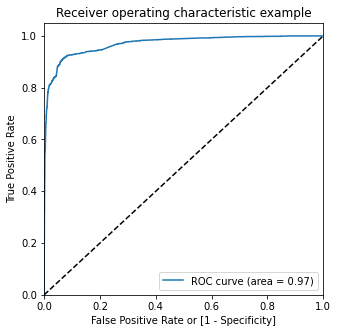

In [160]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

* We are getting a good value of 0.97 indicating a good predictive model whivh is close to 1

## Optimal Cutoff

In [161]:
#Let's create columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.283149,9196,0,1,1,1,0,0,0,0,0,0,0
1,0,0.031440,4696,0,1,0,0,0,0,0,0,0,0,0
2,0,0.576636,3274,1,1,1,1,1,1,1,0,0,0,0
3,0,0.006433,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.989105,1667,1,1,1,1,1,1,1,1,1,1,1


In [162]:
#Calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.816180  0.971488  0.720762
0.2   0.2  0.901069  0.931237  0.882535
0.3   0.3  0.922930  0.916981  0.926584
0.4   0.4  0.925802  0.901468  0.940752
0.5   0.5  0.925004  0.882180  0.951314
0.6   0.6  0.915909  0.828092  0.969861
0.7   0.7  0.916228  0.810063  0.981453
0.8   0.8  0.906335  0.774843  0.987120
0.9   0.9  0.887027  0.718239  0.990726


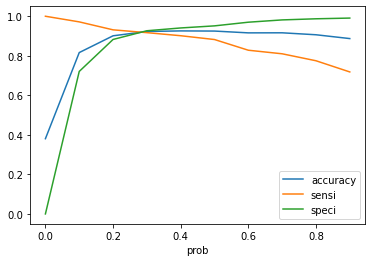

In [163]:
#Plotting accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

* From the above curve, 0.3 is the optimum point to take it as a cutoff probability.

### Accuracy


In [164]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.283149,9196,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.031440,4696,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.576636,3274,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.006433,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.989105,1667,1,1,1,1,1,1,1,1,1,1,1,1


In [165]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.283149,9196,0,28
1,0,0.031440,4696,0,3
2,0,0.576636,3274,1,58
3,0,0.006433,2164,0,1
4,1,0.989105,1667,1,99


In [166]:
#Checking the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.922929631402585

### Confusion Matrix

In [167]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3597,  285],
       [ 198, 2187]], dtype=int64)

In [168]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [169]:
#Calculating the sensitivity

print('Sensitivity :',TP / float(TP+FN) )

Sensitivity : 0.9169811320754717


In [170]:
#Calculating the specificity

print('Specificity:',TN / float(TN+FP))

Specificity: 0.9265842349304482


In [171]:
#Calculating False Postive Rate

print('False Postive Rate :',FP/ float(TN+FP))

False Postive Rate : 0.07341576506955177


In [172]:
#Calculating Positive predictive value (Precision)

print ('Precision :',TP / float(TP+FP))

Precision : 0.8847087378640777


In [173]:
#Calculating Negative predictive value

print ('Negative predictive value :',TN / float(TN+ FN))

Negative predictive value : 0.9478260869565217


We have the following values for the Train Data:

* Accuracy    : 92.29%
* Sensitivity : 91.70%
* Specificity : 92.66%

In [174]:
#Precision score

precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted) #precision

0.8847087378640777

In [175]:
#Recall score

recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted) 

0.9169811320754717

In [176]:
#Precision recall curve

y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

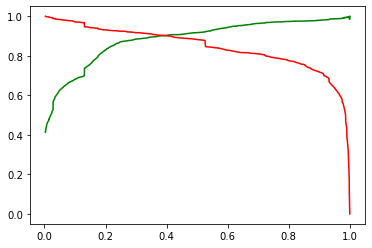

In [177]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Predictions on Test Data

In [178]:
#Scaling for test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
7681,0.575687,-0.311318,0.092860,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
984,-0.090676,-0.550262,0.356568,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
8135,-0.423857,0.812462,-0.170849,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
6915,0.242505,-0.628665,-0.170849,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2712,-0.090676,-0.421456,0.356568,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [179]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Welingak Website,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
7681,-0.311318,0,1,0,0,0,0,0,1,0,1,0,0
984,-0.550262,0,0,0,0,0,0,1,0,0,1,1,0
8135,0.812462,0,1,0,0,0,0,0,0,0,1,0,0
6915,-0.628665,0,0,0,0,0,0,0,1,0,0,0,0
2712,-0.421456,0,0,0,0,0,0,0,0,1,0,0,0


In [180]:
#Adding constant

X_test_sm = sm.add_constant(X_test) 

In [181]:
#Adding constant

y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

7681    0.024819
984     0.025692
8135    0.686054
6915    0.005880
2712    0.953208
244     0.002398
4698    0.014697
8287    0.027549
6791    0.981608
8970    0.005703
dtype: float64

In [182]:
#Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
7681,0.024819
984,0.025692
8135,0.686054
6915,0.005880
2712,0.953208


In [183]:
#Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [184]:
#Putting CustID to index

y_test_df['Prospect ID'] = y_test_df.index

In [185]:
#Removing index for both dataframes

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [186]:
#Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7681,0.024819
1,0,984,0.025692
2,0,8135,0.686054
3,0,6915,0.005880
4,1,2712,0.953208


In [187]:
#Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,7681,0.024819
1,0,984,0.025692
2,0,8135,0.686054
3,0,6915,0.005880
4,1,2712,0.953208


In [188]:
#Rearranging the columns

y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,7681,0,0.024819,2
1,984,0,0.025692,3
2,8135,0,0.686054,69
3,6915,0,0.005880,1
4,2712,1,0.953208,95


In [189]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,7681,0,0.024819,2,0
1,984,0,0.025692,3,0
2,8135,0,0.686054,69,1
3,6915,0,0.005880,1,0
4,2712,1,0.953208,95,1


### Accuracy

In [190]:
#Calculating the overall accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9277736411020104

### Confusion Matrix

In [191]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1563,  113],
       [  81,  929]], dtype=int64)

In [192]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [193]:
#Calculating the sensitivity

print("Sensitivity :", TP / float(TP+FN))

Sensitivity : 0.9198019801980198


In [194]:
#Calculating specificity

print('Specificity :',TN / float(TN+FP))

Specificity : 0.9325775656324582


In [195]:
#Precision

precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8915547024952015

In [196]:
#Recall

recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9198019801980198

We have the following values for the Test Data:

* Accuracy : 92.78%
* Sensitivity : 91.98%
* Specificity : 93.26%

## Comparing the values

### Train Data:
* Accuracy : 92.29%
* Sensitivity : 91.70%
* Specificity : 92.66%

### Test Data:
* Accuracy : 92.78%
* Sensitivity : 91.98%
* Specificity : 93.26%

* The Model predict the Conversion Rate very well and should take good calls based on this model

In [197]:
#Checking the Converted Rate

Converted_Rate = (sum(lea['Converted'])/len(lea['Converted'].index))*100
Converted_Rate

37.92025019546521

In [198]:
#Preparing the dataframe

X[num_cols] = scaler.transform(X[num_cols])

In [199]:
X=X[col]
X.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Welingak Website,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
0,-0.891876,0,0,0,0,1,0,0,0,0,0,1,0
1,0.366310,0,0,0,0,0,0,0,1,0,0,0,0
2,1.967978,0,1,0,0,0,0,0,0,1,0,0,0
3,-0.322519,0,1,0,0,0,0,0,1,0,0,1,0
4,1.773836,0,0,0,0,0,0,0,0,1,0,1,0


In [200]:
#Adding a constant to the dataframe

X_sm = sm.add_constant(X)

In [201]:
#Predicting the y-values on X dataframe

y_ans_pred = res.predict(X_sm)
y_ans_pred[:10]

0    0.003349
1    0.014131
2    0.986855
3    0.000654
4    0.964920
5    0.027549
6    0.975070
7    0.027549
8    0.068205
9    0.140035
dtype: float64

In [202]:
#Converting y_pred to a dataframe

y_ans_pred_df = pd.DataFrame(y_ans_pred)

In [203]:
#Converting y to dataframe

y_df = pd.DataFrame(y)

In [204]:
#Putting Lead_Number to index

y_df['Lead_Number'] = lead_copy['Lead Number']

In [205]:
#Removing index for both dataframes

y_ans_pred_df.reset_index(drop=True, inplace=True)
y_df.reset_index(drop=True, inplace=True)

In [206]:
#Appending y_test_df and y_df

y_ans_final = pd.concat([y_df, y_ans_pred_df],axis=1)

In [207]:
#Renaming the column

y_ans_final= y_ans_final.rename(columns={ 0 : 'Conversion_Prob'})
y_ans_final.head()

,Converted,Lead_Number,Conversion_Prob
0,0,660737,0.003349
1,0,660728,0.014131
2,1,660727,0.986855
3,0,660719,0.000654
4,1,660681,0.964920


In [208]:
#Finding the Predicted values using the probability cut off

y_ans_final['final_predicted'] = y_ans_final.Conversion_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [209]:
#Appending the score to the dataframe.

y_ans_final['Score'] = round(y_ans_final['Conversion_Prob'] * 100, 2)
y_ans_final.head()

,Converted,Lead_Number,Conversion_Prob,final_predicted,Score
0,0,660737,0.003349,0,0.33
1,0,660728,0.014131,0,1.41
2,1,660727,0.986855,1,98.69
3,0,660719,0.000654,0,0.07
4,1,660681,0.964920,1,96.49


In [210]:
#Calculating the overall accuracy.

metrics.accuracy_score(y_ans_final.Converted, y_ans_final.final_predicted)

0.9239361108008489

In [211]:
#Confusion Matrix

confusionAns= metrics.confusion_matrix(y_ans_final.Converted, y_ans_final.final_predicted)
confusionAns

array([[5156,  402],
       [ 279, 3116]], dtype=int64)

In [212]:
#Parameters

TP = confusionAns[1,1] # true positive 
TN = confusionAns[0,0] # true negatives
FP = confusionAns[0,1] # false positives
FN = confusionAns[1,0] # false negatives

In [213]:
#Calculating the sensitivity

sensitivity = round(TP / float(TP+FN),2) *100 
print(sensitivity)

92.0


In [214]:
#Calculating specificity

TN / float(TN+FP)

0.9276718243972653

In [215]:
#Sorting values to find top leads.

Resultss = y_ans_final.sort_values(by='Score', ascending=False)
Resultss.head()

,Converted,Lead_Number,Conversion_Prob,final_predicted,Score
7854,1,587853,0.999962,1,100.0
3598,1,624348,0.999986,1,100.0
3920,1,621078,0.999994,1,100.0
2387,1,635776,0.999961,1,100.0
3981,1,620454,0.999953,1,100.0


In [216]:
print(Resultss.shape)

(8953, 5)


In [217]:
FinalResult = Resultss.loc[Resultss['Score'] >= 30]
FinalResult.head()

,Converted,Lead_Number,Conversion_Prob,final_predicted,Score
7854,1,587853,0.999962,1,100.0
3598,1,624348,0.999986,1,100.0
3920,1,621078,0.999994,1,100.0
2387,1,635776,0.999961,1,100.0
3981,1,620454,0.999953,1,100.0


In [218]:
print(FinalResult.shape)

(3518, 5)


In [219]:
#Checking the Converted Rate

Converted_Rate_AfterModelling= (sum(FinalResult['Converted'])/len(FinalResult['Converted'].index))*100
Converted_Rate_AfterModelling

88.5730528709494

* We provide a list of only 3500 who have the chances of getting converted into a potential lead therefore it is easier for the company to limit their target.
* We found the conversion rate to be around 88%.

In [220]:
HotLeads = Resultss.loc[Resultss['Score'] >= 95]

In [221]:
#Checking the Converted Rate

Converted_Rate_ForHotLeads= HotLeads.Converted.value_counts(normalize = True)[1]
Converted_Rate_ForHotLeads

0.9864925709140027

In [222]:
HotLeads.shape

(2221, 5)

* We provide a list of only 2000 who are mostly getting converted to a lead therefore it is easier for the company to limit their target.
* We found the conversion rate to be around 98%.
* This list target the top 10% of the customers.